## Exploring the C. Elegans' neural network

In this example, we represent the Caenorhabditis elegans connectome as a directed graph, were each neuron is a node and a synapse from a neuron a to a neuron b will be represented as a directed arc between these two nodes.

Three files are available:

*   "celegans277labels.csv": contains the names of each neuron.
*   "celegans277positions.csv": the location in the Anterior - Posterior / Ventral - Dorsal plan.
*   "celegans277matrix.csv": Matrix M of connections, rows and columns correspond to neurons, and the element (i,j) = 1 if the i-th neuron has a synaptic connection with the j-th neuron (directed connection), and (i,j) = 0 otherwise. Considering the network as a graph, this matrix would correspond to the so-called adjacency matrix.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: import data

In [ ]:
nodes_labels = pd.read_csv("drive/My Drive/Colab Notebooks/celegans277labels.csv", header=None) 
adjacency = pd.read_csv("drive/My Drive/Colab Notebooks/celegans277matrix.csv", header=None)
locations = pd.read_csv("drive/My Drive/Colab Notebooks/celegans277positions.csv", header=None)
adjacency.index = nodes_labels[0] 
adjacency.columns = nodes_labels[0]
locations.index = nodes_labels[0]
inter_neuron_dist = pd.DataFrame(pairwise_distances(locations))
inter_neuron_dist.columns = nodes_labels[0]
inter_neuron_dist.index = nodes_labels[0]
inter_neuron_dist.head()


,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,0.004850,0.005171,0.005157,0.071657,0.072781,0.074034,0.074281,0.075752,0.075708,...,0.879595,0.925826,0.045768,0.148903,0.233522,0.327535,0.418788,0.500684,0.608913,0.700111
ADAR,0.004850,0.000000,0.004004,0.007141,0.068261,0.069283,0.070109,0.070422,0.072290,0.072327,...,0.882789,0.928948,0.050171,0.152795,0.237204,0.331086,0.422265,0.504087,0.612279,0.703425
ADEL,0.005171,0.004004,0.000000,0.003873,0.066492,0.067626,0.068987,0.069209,0.070593,0.070543,...,0.884763,0.930989,0.050632,0.154001,0.238665,0.332695,0.423954,0.505854,0.614083,0.705282
ADER,0.005157,0.007141,0.003873,0.000000,0.068233,0.069470,0.071290,0.071439,0.072392,0.072258,...,0.883429,0.929726,0.048178,0.152003,0.236869,0.331023,0.422350,0.504321,0.612584,0.703832
ADFL,0.071657,0.068261,0.066492,0.068233,0.000000,0.002372,0.012054,0.010565,0.004296,0.004070,...,0.951023,0.997134,0.116032,0.220199,0.305094,0.399184,0.490444,0.572320,0.680529,0.771686


In [ ]:
locations.head()

,0,1
0,,
ADAL,0.011068,0.005903
ADAR,0.014206,0.002204
ADEL,0.016233,0.005657
ADER,0.014941,0.009308
ADFL,0.082393,-0.000984


In [ ]:
adjacency.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAR,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADEL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADFL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: plot network

In [ ]:
def plot_connectome():
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,12))
    for i,row in enumerate(adjacency.values):
        for j,columns in enumerate(row):
            if columns == 1:
                xs = [locations.values[i,0],locations.values[j,0]]
                ys = [locations.values[i,1],locations.values[j,1]]
                plt.plot(xs,ys,color="red",alpha=0.03)
    plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Posterior - Anterior(mm)",fontsize=30)
    plt.ylabel("Dorsal - Ventral(mm)",fontsize=30)


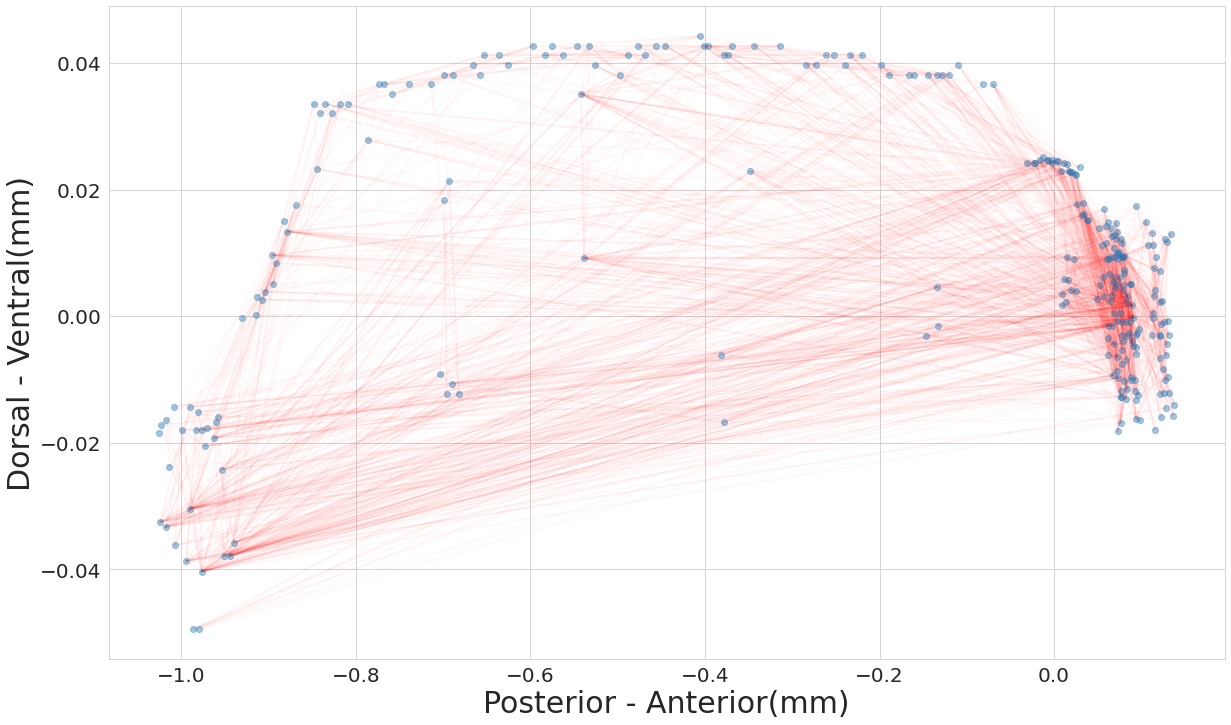

In [ ]:
plot_connectome()


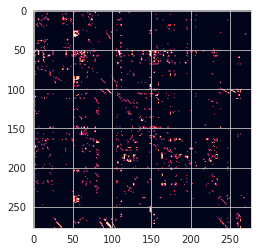

In [ ]:
plt.imshow(adjacency)

Text(0, 0.5, 'frequency')

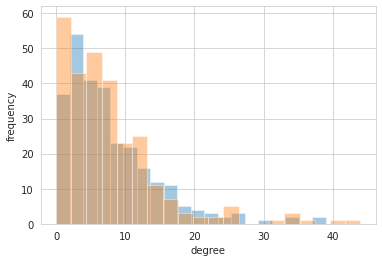

In [ ]:
in_degree = adjacency.sum(axis=0)
out_degree = adjacency.sum(axis=1)
plt.hist(in_degree, alpha=0.4,bins=20) #blue
plt.hist(out_degree, alpha=0.4,bins=20) #orange
plt.xlabel("degree")
plt.ylabel("frequency")